<a href="https://colab.research.google.com/github/cbachen1997/CAUstudy/blob/master/Happyrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#挂载谷歌云盘
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
####google云盘授权#####
##每个notebook执行一次###
__author__='CBA'
from google.colab import drive

#增加PyDrive操作库
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#授权登录
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [42]:
#更改运行目录
import os
os.chdir("/content/gdrive/My Drive/AndrewNgTest/SmileFaceReco")

In [19]:
import time
import numpy as no
#loading keras module
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#pydot绘制模型
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import kt_utils 
#导入keras抽象API
import keras.backend as K
#format有（样本，通道，高，宽）和（样本，高，宽，通道）两种，last是第二种
K.set_image_data_format('channels_last')
#绘图module
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
#载入数据集
from kt_utils import *
from resnets_utils import *

In [31]:
#加载数据集
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = kt_utils.load_dataset()
#归一化
X_train = X_train_orig/255.
X_test = X_test_orig/255.
#reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T
#
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [29]:
def model(input_shape):
    """
    模型大纲
    """
    #定义一个tensor的placeholder，维度为input_shape
    #X_input = Input(input_shape)
    
    #使用0填充：X_input的周围填充0
    #X = ZeroPadding2D((3,3))(X_input)
    
    # 对X使用 CONV -> BN -> RELU 块
    #X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    #X = BatchNormalization(axis = 3, name = 'bn0')(X)
    #X = Activation('relu')(X)
    
    #最大值池化层
    #X = MaxPooling2D((2,2),name="max_pool")(X)
    
    #降维，矩阵转化为向量 + 全连接层
    #X = Flatten()(X)
    #X = Dense(1, activation='sigmoid', name='fc')(X)
    
    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    #model = Model(inputs = X_input, outputs = X, name='HappyModel')
    pass
    #return model

In [30]:
def HappyModel(input_shape):
    """
    实现一个检测笑容的模型
    
    参数：
        input_shape - 输入的数据的维度
    返回：
        model - 创建的Keras的模型
        
    """
    X_input=Input(input_shape)
    #使用0填充：X_input的周围3行3列填充0
    X = ZeroPadding2D((3, 3))(X_input)

    #对X使用 CONV -> BN -> RELU 块
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    #axis=3为三维
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    #最大值池化层
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #降维，矩阵转化为向量 + 全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [ ]:
#创建一个模型实体
happy_model = HappyModel(X_train.shape[1:])
#编译模型
#梯度下降法、二分类交叉熵为代价函数、度量为精度
happy_model.compile("adam","binary_crossentropy", metrics=['accuracy'])
#训练模型
#请注意，此操作会花费你大约6-10分钟。
happy_model.fit(X_train, Y_train, epochs=40, batch_size=50)
#评估模型
preds = happy_model.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print ("误差值 = " + str(preds[0]))
print ("准确度 = " + str(preds[1]))

[[1.]]


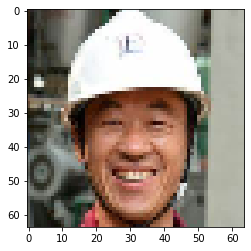

In [43]:
#网上随便找的图片，侵删
img_path = '2.png'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happy_model.predict(x))